In [1]:
!nvidia-smi

Wed Nov 22 14:36:22 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.01                 Driver Version: 546.01       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2070 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8               6W /  90W |    112MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.preprocessing import image
import pydotplus
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, PReLU, Add, Multiply, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Reshape
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from tensorflow.keras.layers import LSTM, Conv1D
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model


In [3]:
class_num = 2

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='ReLU', input_shape=(224, 224, 3)))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='ReLU'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='ReLU'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='ReLU'))
model.add(MaxPool2D(2, 2))

model.add(Conv2D(256, (3, 3), activation='ReLU'))
model.add(MaxPool2D(2, 2))

model.add(Flatten())
model.add(Dense(1024, activation='ReLU'))
model.add(Dropout(0.5))

model.add(Dense(class_num, activation='softmax'))

model.summary()

# Plot the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [4]:
op = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer=op,
  metrics=['accuracy']
)

model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  brightness_range=(0.4, 0.7),
                                  vertical_flip= True,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'D:\Research\Helmet\Helmet dataset\train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(r'D:\Research\Helmet\Helmet dataset\val',
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(r'D:\Research\Helmet\Helmet dataset\test',
                                           target_size = (224,224),
                                           batch_size = 1,
                                           class_mode = 'categorical')

Found 9479 images belonging to 2 classes.
Found 1186 images belonging to 2 classes.
Found 1185 images belonging to 2 classes.


In [6]:
filepath = r"D:\Research\Helmet\weight\helmet.h5"

checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_weights_only=True,
                              save_best_only=True, mode='max')

log_csv = CSVLogger(r'D:\Research\Helmet\weight\helmet.csv', separator=',', append=False)


callbacks_list = [checkpoint1, log_csv]

train_steps_per_epoch = len(training_set)
val_steps_per_epoch = len(val_set)

r = model.fit(
    training_set,
    epochs=100,
    validation_data=val_set,
    steps_per_epoch=train_steps_per_epoch,
    validation_steps=val_steps_per_epoch,
    callbacks=callbacks_list,
    shuffle=False
)

Epoch 1/100
297/297 [==============================] - ETA: 0s - loss: 0.4308 - accuracy: 0.7988
Epoch 1: val_accuracy improved from -inf to 0.89123, saving model to D:\Research\Helmet\weight\helmet.h5
297/297 [==============================] - 260s 869ms/step - loss: 0.4308 - accuracy: 0.7988 - val_loss: 0.2992 - val_accuracy: 0.8912
Epoch 2/100
296/297 [============================>.] - ETA: 0s - loss: 0.3058 - accuracy: 0.8791
Epoch 2: val_accuracy improved from 0.89123 to 0.91231, saving model to D:\Research\Helmet\weight\helmet.h5
297/297 [==============================] - 61s 206ms/step - loss: 0.3058 - accuracy: 0.8792 - val_loss: 0.2988 - val_accuracy: 0.9123
Epoch 3/100
296/297 [============================>.] - ETA: 0s - loss: 0.2761 - accuracy: 0.8929
Epoch 3: val_accuracy did not improve from 0.91231
297/297 [==============================] - 61s 205ms/step - loss: 0.2762 - accuracy: 0.8929 - val_loss: 0.5118 - val_accuracy: 0.7976
Epoch 4/100
296/297 [=====================

Epoch 28/100
296/297 [============================>.] - ETA: 0s - loss: 0.0426 - accuracy: 0.9847
Epoch 28: val_accuracy did not improve from 0.97723
297/297 [==============================] - 64s 214ms/step - loss: 0.0428 - accuracy: 0.9846 - val_loss: 0.1546 - val_accuracy: 0.9553
Epoch 29/100
296/297 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9907
Epoch 29: val_accuracy improved from 0.97723 to 0.98398, saving model to D:\Research\Helmet\weight\helmet.h5
297/297 [==============================] - 63s 210ms/step - loss: 0.0259 - accuracy: 0.9907 - val_loss: 0.0736 - val_accuracy: 0.9840
Epoch 30/100
296/297 [============================>.] - ETA: 0s - loss: 0.0329 - accuracy: 0.9889
Epoch 30: val_accuracy did not improve from 0.98398
297/297 [==============================] - 66s 220ms/step - loss: 0.0329 - accuracy: 0.9889 - val_loss: 0.2122 - val_accuracy: 0.9578
Epoch 31/100
296/297 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 

297/297 [==============================] - 62s 210ms/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.1236 - val_accuracy: 0.9823
Epoch 85/100
296/297 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9956
Epoch 85: val_accuracy did not improve from 0.99494
297/297 [==============================] - 62s 209ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.1518 - val_accuracy: 0.9730
Epoch 86/100
296/297 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9967
Epoch 86: val_accuracy did not improve from 0.99494
297/297 [==============================] - 63s 210ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.0866 - val_accuracy: 0.9874
Epoch 87/100
296/297 [============================>.] - ETA: 0s - loss: 0.0221 - accuracy: 0.9939
Epoch 87: val_accuracy did not improve from 0.99494
297/297 [==============================] - 62s 209ms/step - loss: 0.0221 - accuracy: 0.9939 - val_loss: 0.1164 - val_accuracy: 0.9815
Epoch 88/100
2

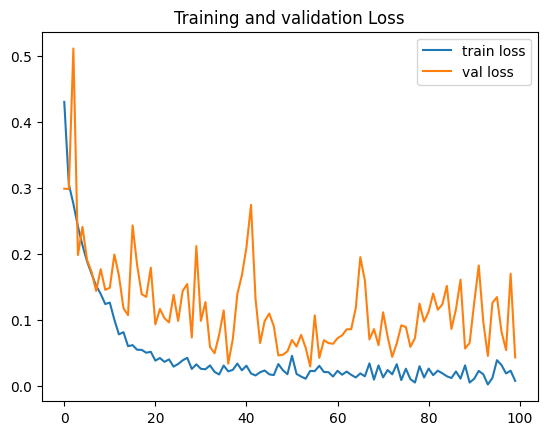

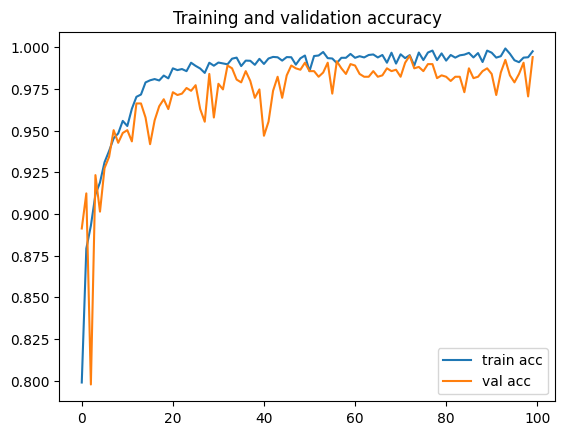

<Figure size 640x480 with 0 Axes>

In [7]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [8]:
model.load_weights(filepath)
Adam = tf.keras.optimizers.Adam(lr=0.001)


preds = model.evaluate_generator(test_set)
print ("Loss = ",float(preds[0]))
print ("Test Accuracy = ",float(preds[1])*100)

C:\Users\User\miniconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\User\AppData\Local\Temp\ipykernel_15920\3937893717.py:5: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  preds = model.evaluate_generator(test_set)


Loss =  0.023248843848705292
Test Accuracy =  99.32489395141602
